<a href="https://colab.research.google.com/github/wiramonwrm/data-analytics/blob/main/Sleep_health_lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ss.csv')

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [6]:
df.shape

(373, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                373 non-null    int64  
 1   Gender                   373 non-null    object 
 2   Age                      373 non-null    int64  
 3   Occupation               373 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         373 non-null    int64  
 6   Physical Activity Level  373 non-null    int64  
 7   Stress Level             373 non-null    int64  
 8   BMI Category             373 non-null    object 
 9   Blood Pressure           373 non-null    object 
 10  Heart Rate               373 non-null    int64  
 11  Daily Steps              373 non-null    int64  
 12  Sleep Disorder           154 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.0+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,373.0,187.000000,107.820066,1.0,94.0,187.0,280.0,373.0
Age,373.0,42.139410,8.640793,27.0,35.0,43.0,50.0,59.0
Sleep Duration,373.0,7.129491,0.795139,5.8,6.4,7.2,7.8,8.5
Quality of Sleep,373.0,7.308311,1.195359,4.0,6.0,7.0,8.0,9.0
Physical Activity Level,373.0,59.128686,20.842589,30.0,45.0,60.0,75.0,90.0
Stress Level,373.0,5.391421,1.772590,3.0,4.0,5.0,7.0,8.0
Heart Rate,373.0,70.171582,4.139704,65.0,68.0,70.0,72.0,86.0
Daily Steps,373.0,6816.353887,1620.060932,3000.0,5600.0,7000.0,8000.0,10000.0


In [9]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [10]:
df = df.fillna(0)

In [11]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [12]:
df.duplicated().sum()

0

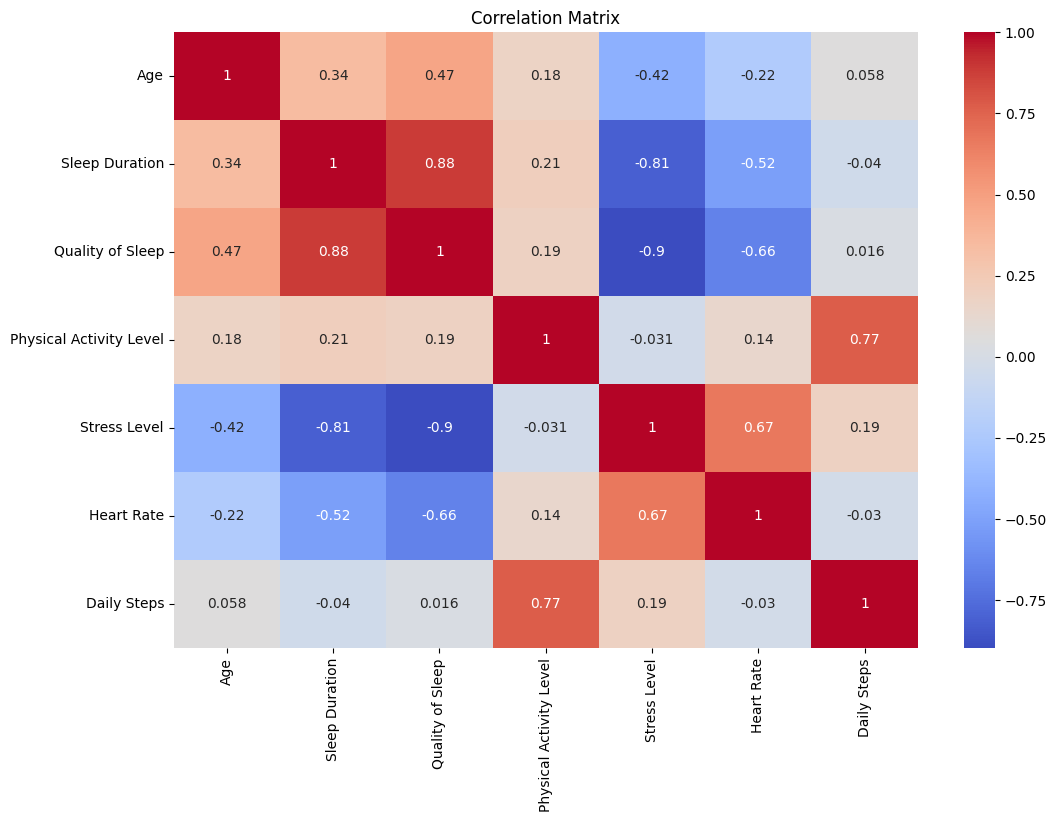

In [13]:
df=df.drop('Person ID', axis = 1)
numeric_cols = df.select_dtypes(include=np.number).columns  # اختيار الأعمدة الرقمية فقط
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

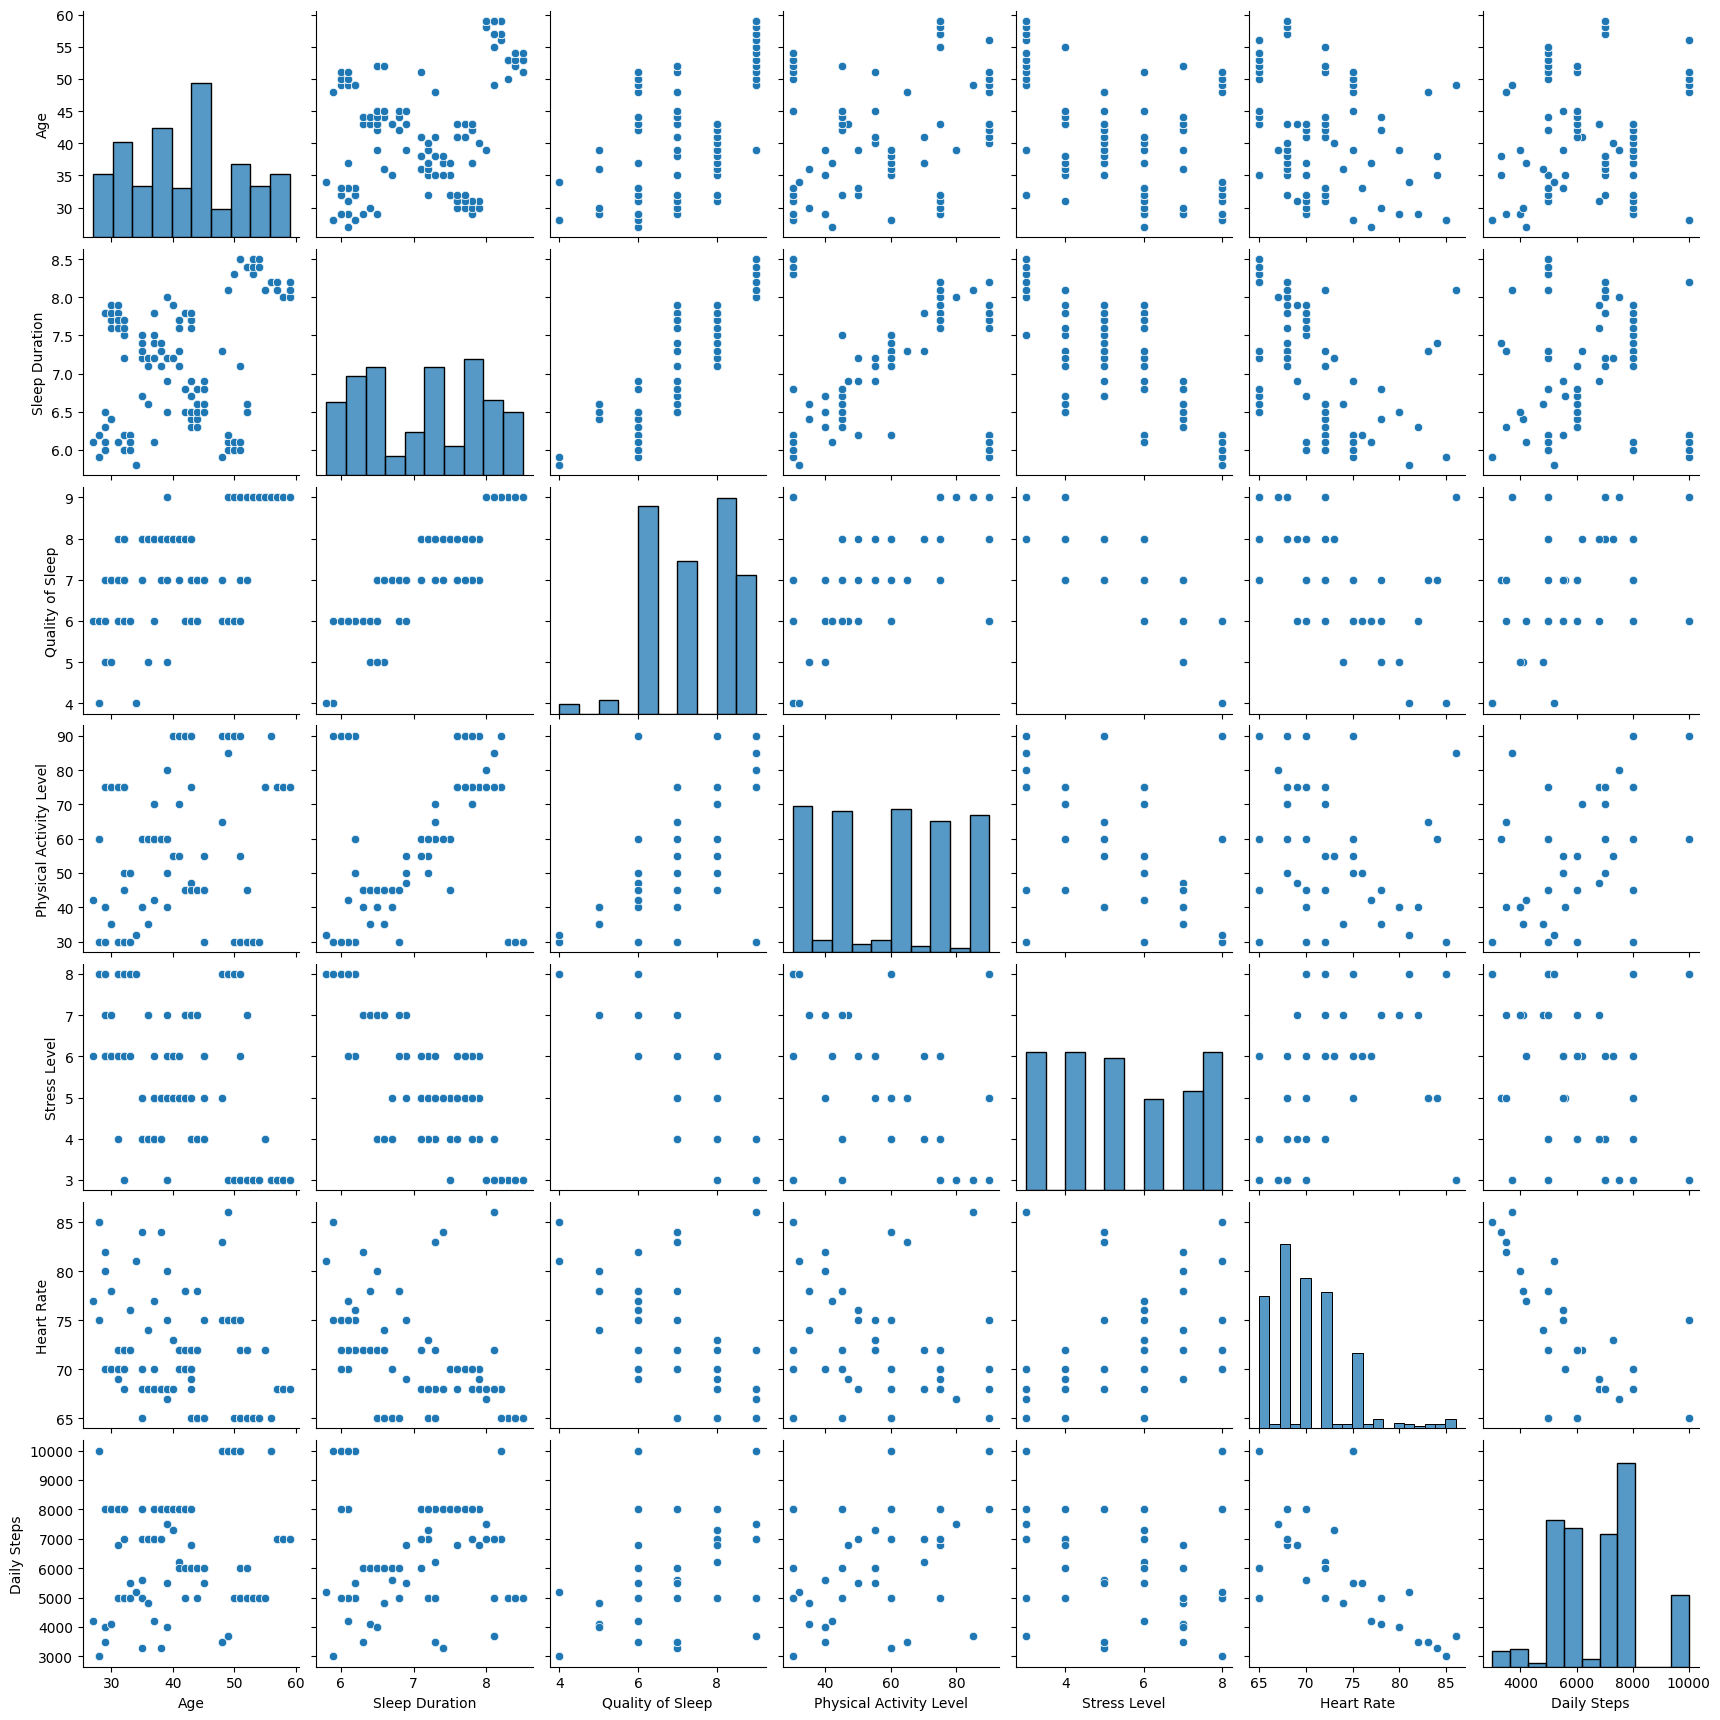

In [14]:
sns.pairplot(df,kind='scatter')
plt.show()

In [15]:
df.columns.to_list()


['Gender',
 'Age',
 'Occupation',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'BMI Category',
 'Blood Pressure',
 'Heart Rate',
 'Daily Steps',
 'Sleep Disorder']

In [16]:
import plotly.express as px

columns = df.columns.to_list()

for column in columns:
    fig = px.histogram(data_frame=df, x=column)
    fig.show()

In [17]:
txt = '1120/80'
x = txt.split('/')


In [18]:
df2 = df

In [19]:
df2[['Top BP', 'Botton BP']] = df['Blood Pressure'].str.split('/', expand=True)

In [20]:
df2[['Top BP', 'Botton BP']]= df2[['Top BP', 'Botton BP']].astype('int64')

In [21]:
df2.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Top BP,Botton BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [22]:
df2 = df2.assign(BMI_check = lambda x: (x['BMI Category'] == 'Normal'))

In [23]:
df2

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Top BP,Botton BP,BMI_check
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0,126,83,False
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80,True
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80,True
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,False
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,False
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,False
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,False
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,False


In [24]:
df2 = df2.assign(BP_check = (lambda x: (x['Top BP'] <= 120) & (x['Botton BP'] < 80)))

In [25]:
df2

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Top BP,Botton BP,BMI_check,BP_check
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0,126,83,False,False
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80,True,False
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80,True,False
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,False,False
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,False,False
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,False,False
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,False,False
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,False,False


In [26]:
df2 = df2.assign(Overall_Health = (lambda x: x['BMI_check'] & x['BP_check']))

In [27]:
df2

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Top BP,Botton BP,BMI_check,BP_check,Overall_Health
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0,126,83,False,False,False
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80,True,False,False
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80,True,False,False
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,False,False,False
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,False,False,False
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,False,False,False
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,False,False,False
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,False,False,False


In [28]:
df2 = df2.drop(['BMI Category', 'Blood Pressure', 'Top BP', 'Botton BP'],axis=1)

In [29]:
df2

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,BMI_check,BP_check,Overall_Health
0,Male,27,Software Engineer,6.1,6,42,6,77,4200,0,False,False,False
1,Male,28,Doctor,6.2,6,60,8,75,10000,0,True,False,False
2,Male,28,Doctor,6.2,6,60,8,75,10000,0,True,False,False
3,Male,28,Sales Representative,5.9,4,30,8,85,3000,Sleep Apnea,False,False,False
4,Male,28,Sales Representative,5.9,4,30,8,85,3000,Sleep Apnea,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Female,59,Nurse,8.1,9,75,3,68,7000,Sleep Apnea,False,False,False
369,Female,59,Nurse,8.1,9,75,3,68,7000,Sleep Apnea,False,False,False
370,Female,59,Nurse,8.0,9,75,3,68,7000,Sleep Apnea,False,False,False
371,Female,59,Nurse,8.1,9,75,3,68,7000,Sleep Apnea,False,False,False


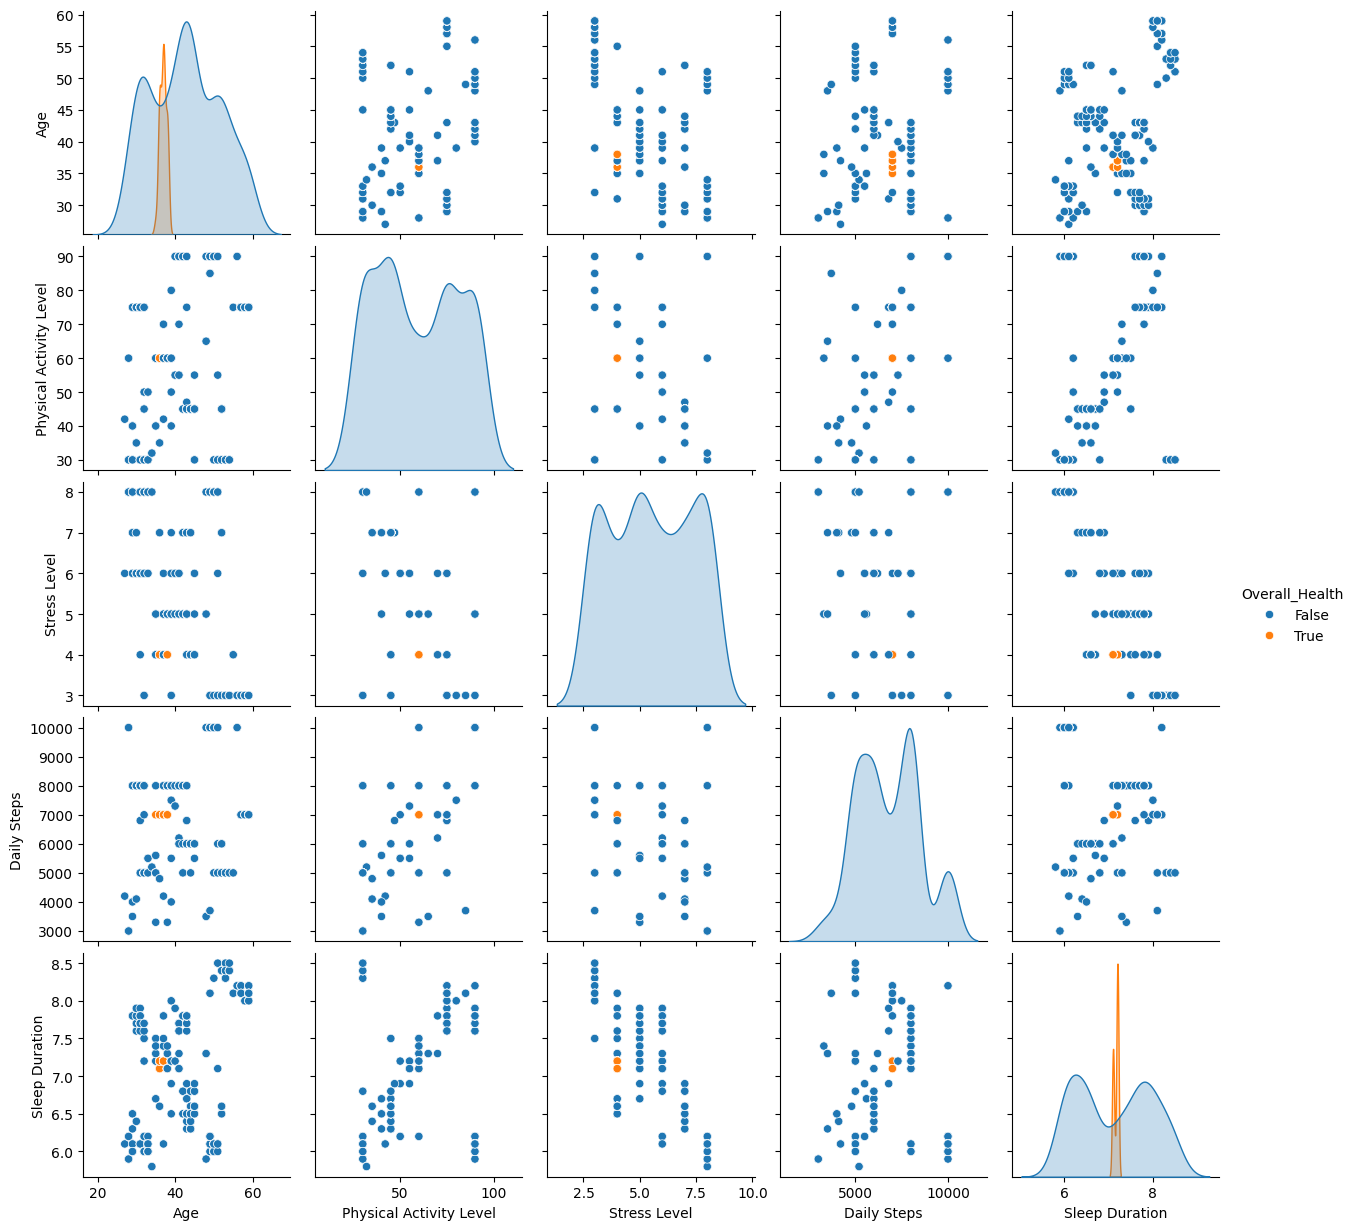

In [30]:
sns.pairplot(df2, vars=['Age', 'Physical Activity Level' ,'Stress Level','Daily Steps', 'Sleep Duration'], hue = "Overall_Health")


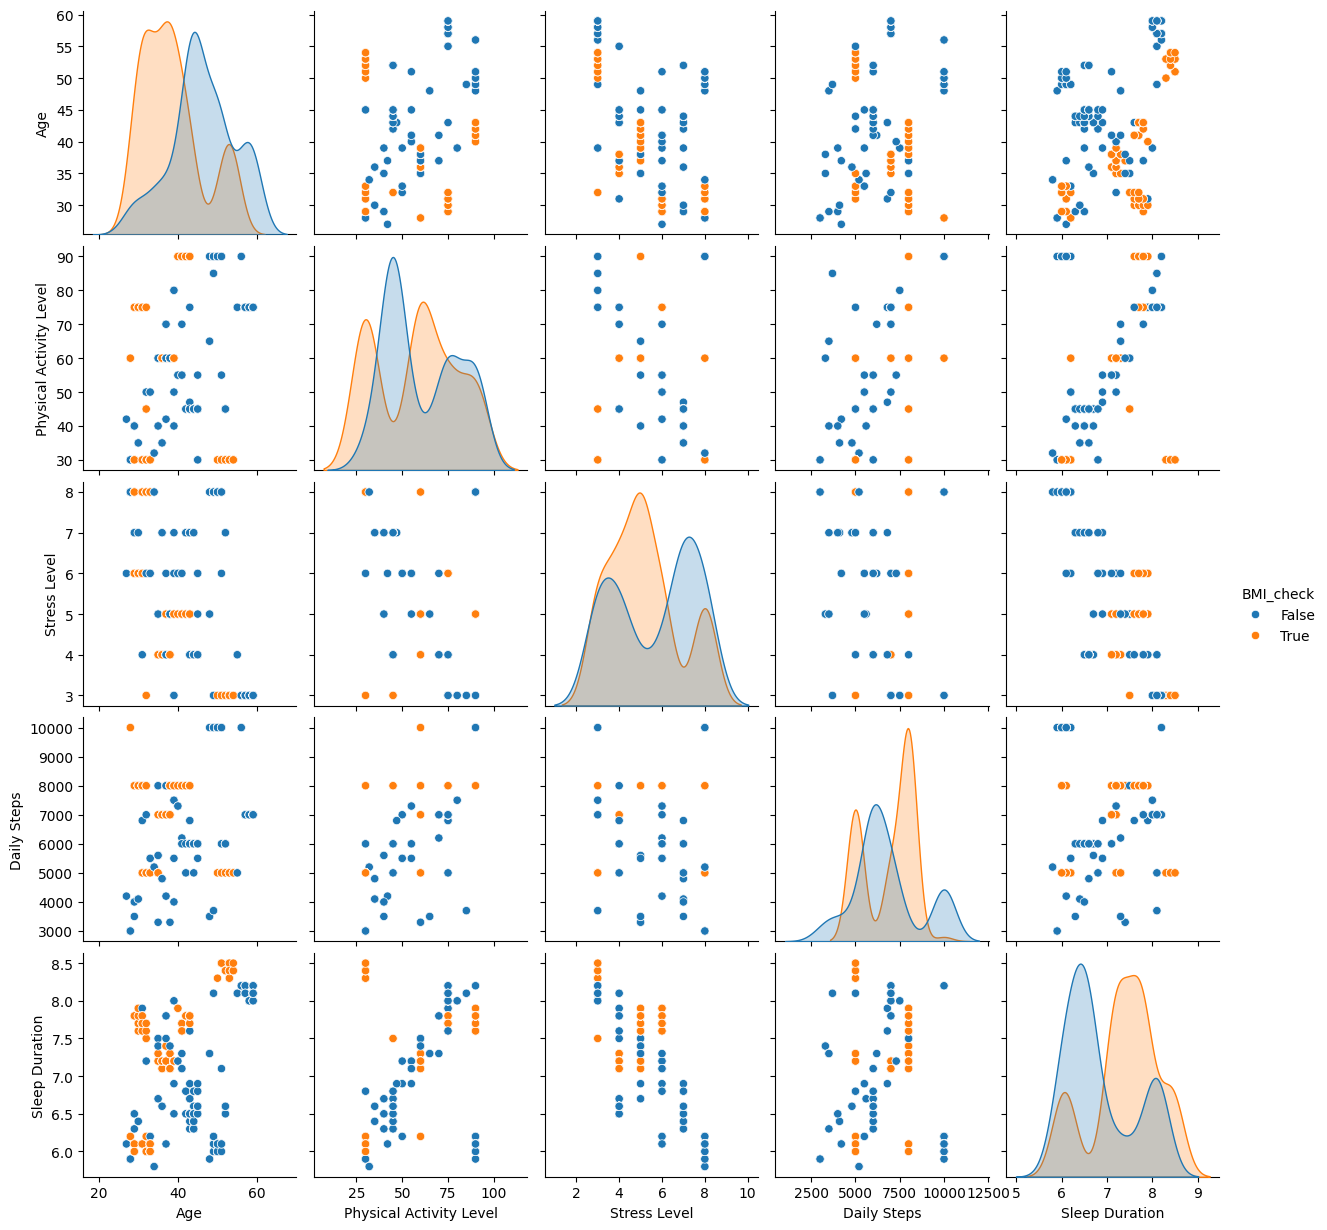

In [31]:
sns.pairplot(df2, vars=['Age', 'Physical Activity Level' ,'Stress Level','Daily Steps', 'Sleep Duration'], hue = "BMI_check")

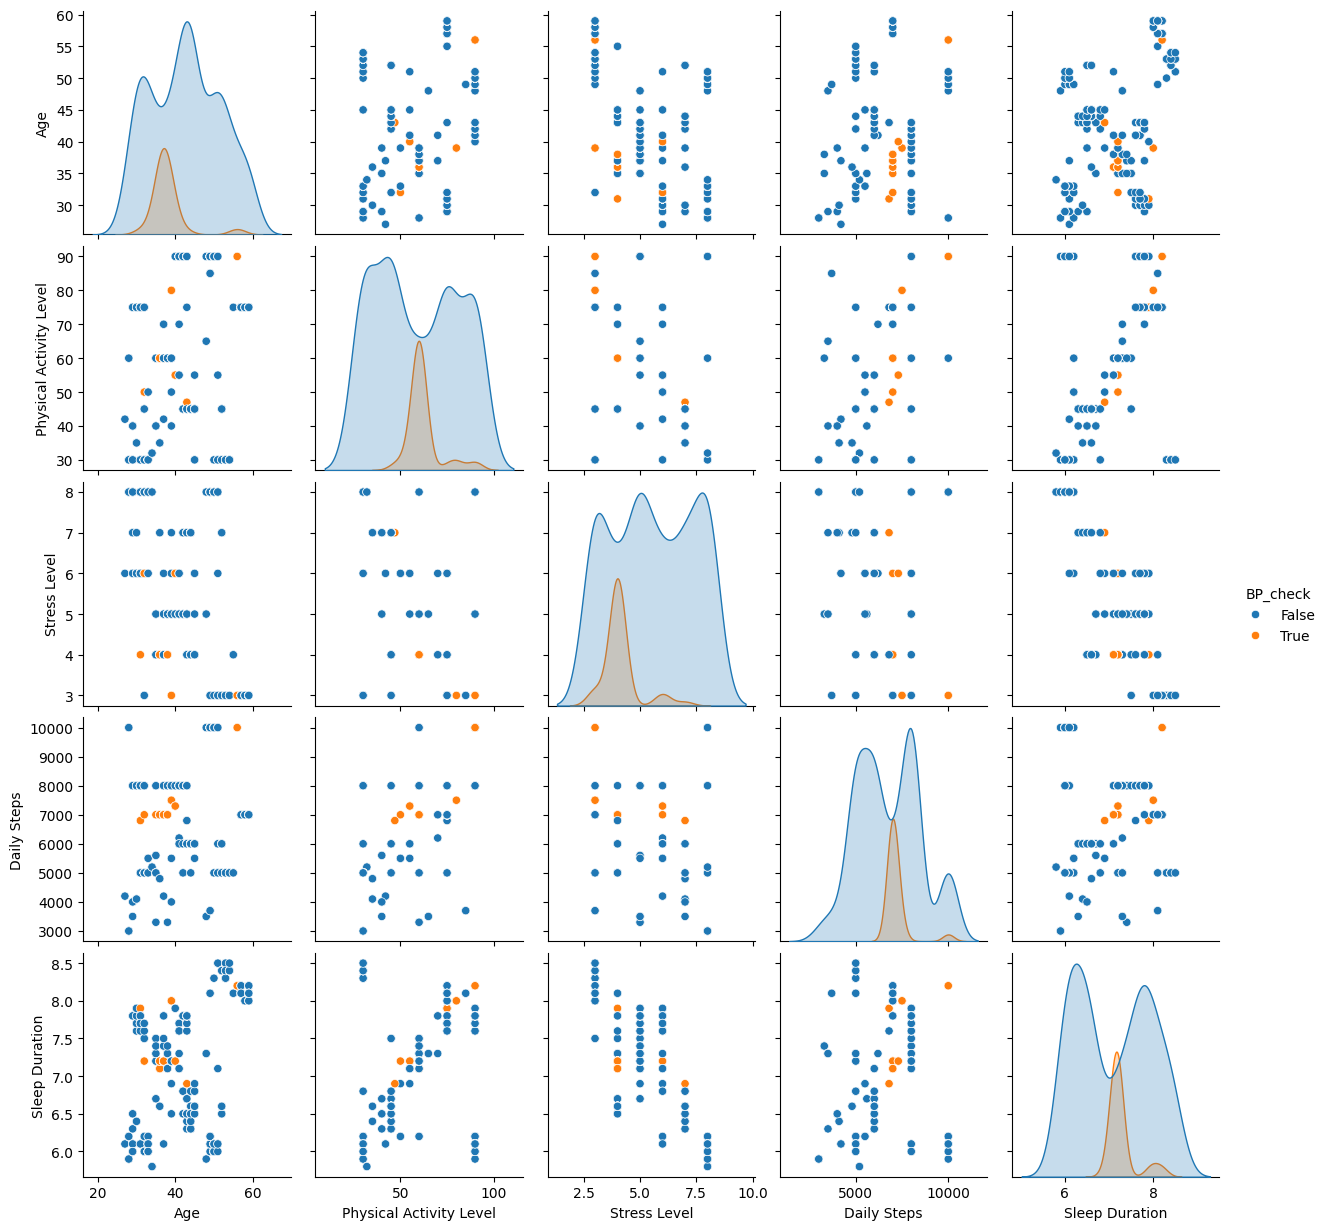

In [32]:
sns.pairplot(df2, vars=['Age', 'Physical Activity Level' ,'Stress Level','Daily Steps', 'Sleep Duration'], hue = "BP_check")

In [33]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,42.139410,8.640793,27.0,35.0,43.0,50.0,59.0
Sleep Duration,373.0,7.129491,0.795139,5.8,6.4,7.2,7.8,8.5
Quality of Sleep,373.0,7.308311,1.195359,4.0,6.0,7.0,8.0,9.0
Physical Activity Level,373.0,59.128686,20.842589,30.0,45.0,60.0,75.0,90.0
Stress Level,373.0,5.391421,1.772590,3.0,4.0,5.0,7.0,8.0
Heart Rate,373.0,70.171582,4.139704,65.0,68.0,70.0,72.0,86.0
Daily Steps,373.0,6816.353887,1620.060932,3000.0,5600.0,7000.0,8000.0,10000.0


In [59]:
def check_BMI(value):
  if value == 'Normal':
    return 0
  elif value == 'Overweight' or value =='Underweight':
    return -1
  else:
    return -3

def check_BP(top, bottom):
  if top <= 120 and bottom <= 80:
    return 0
  elif top < 130 and bottom <= 80:
    return -1
  elif top < 140 and bottom < 90:
    return -2
  else:
    return -3

def combine_health(h1,h2):
  if h1+h2 >= -2:
    return 0
  else:
    return 1

In [60]:
df3 = df

In [61]:
df3['BMI_check'] = df['BMI Category'].apply(check_BMI)

In [62]:
df3[['Top BP', 'Botton BP']] = df3['Blood Pressure'].str.split('/', expand=True)
df3[['Top BP', 'Botton BP']]= df3[['Top BP', 'Botton BP']].astype('int64')

In [63]:
df3['BP_check'] = df3.apply(lambda x: check_BP(x['Top BP'],x['Botton BP']), axis = 1)

In [64]:
df3['Overall_health'] = df3.apply(lambda x: combine_health(x['BMI_check'],x['BP_check']), axis = 1)

In [65]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,42.139410,8.640793,27.0,35.0,43.0,50.0,59.0
Sleep Duration,373.0,7.129491,0.795139,5.8,6.4,7.2,7.8,8.5
Quality of Sleep,373.0,7.308311,1.195359,4.0,6.0,7.0,8.0,9.0
Physical Activity Level,373.0,59.128686,20.842589,30.0,45.0,60.0,75.0,90.0
Stress Level,373.0,5.391421,1.772590,3.0,4.0,5.0,7.0,8.0
Heart Rate,373.0,70.171582,4.139704,65.0,68.0,70.0,72.0,86.0
Daily Steps,373.0,6816.353887,1620.060932,3000.0,5600.0,7000.0,8000.0,10000.0
Top BP,373.0,128.522788,7.735732,115.0,125.0,130.0,135.0,142.0
Botton BP,373.0,84.621984,6.146443,75.0,80.0,85.0,90.0,95.0
BMI_check,373.0,-0.643432,0.854426,-3.0,-1.0,0.0,0.0,0.0


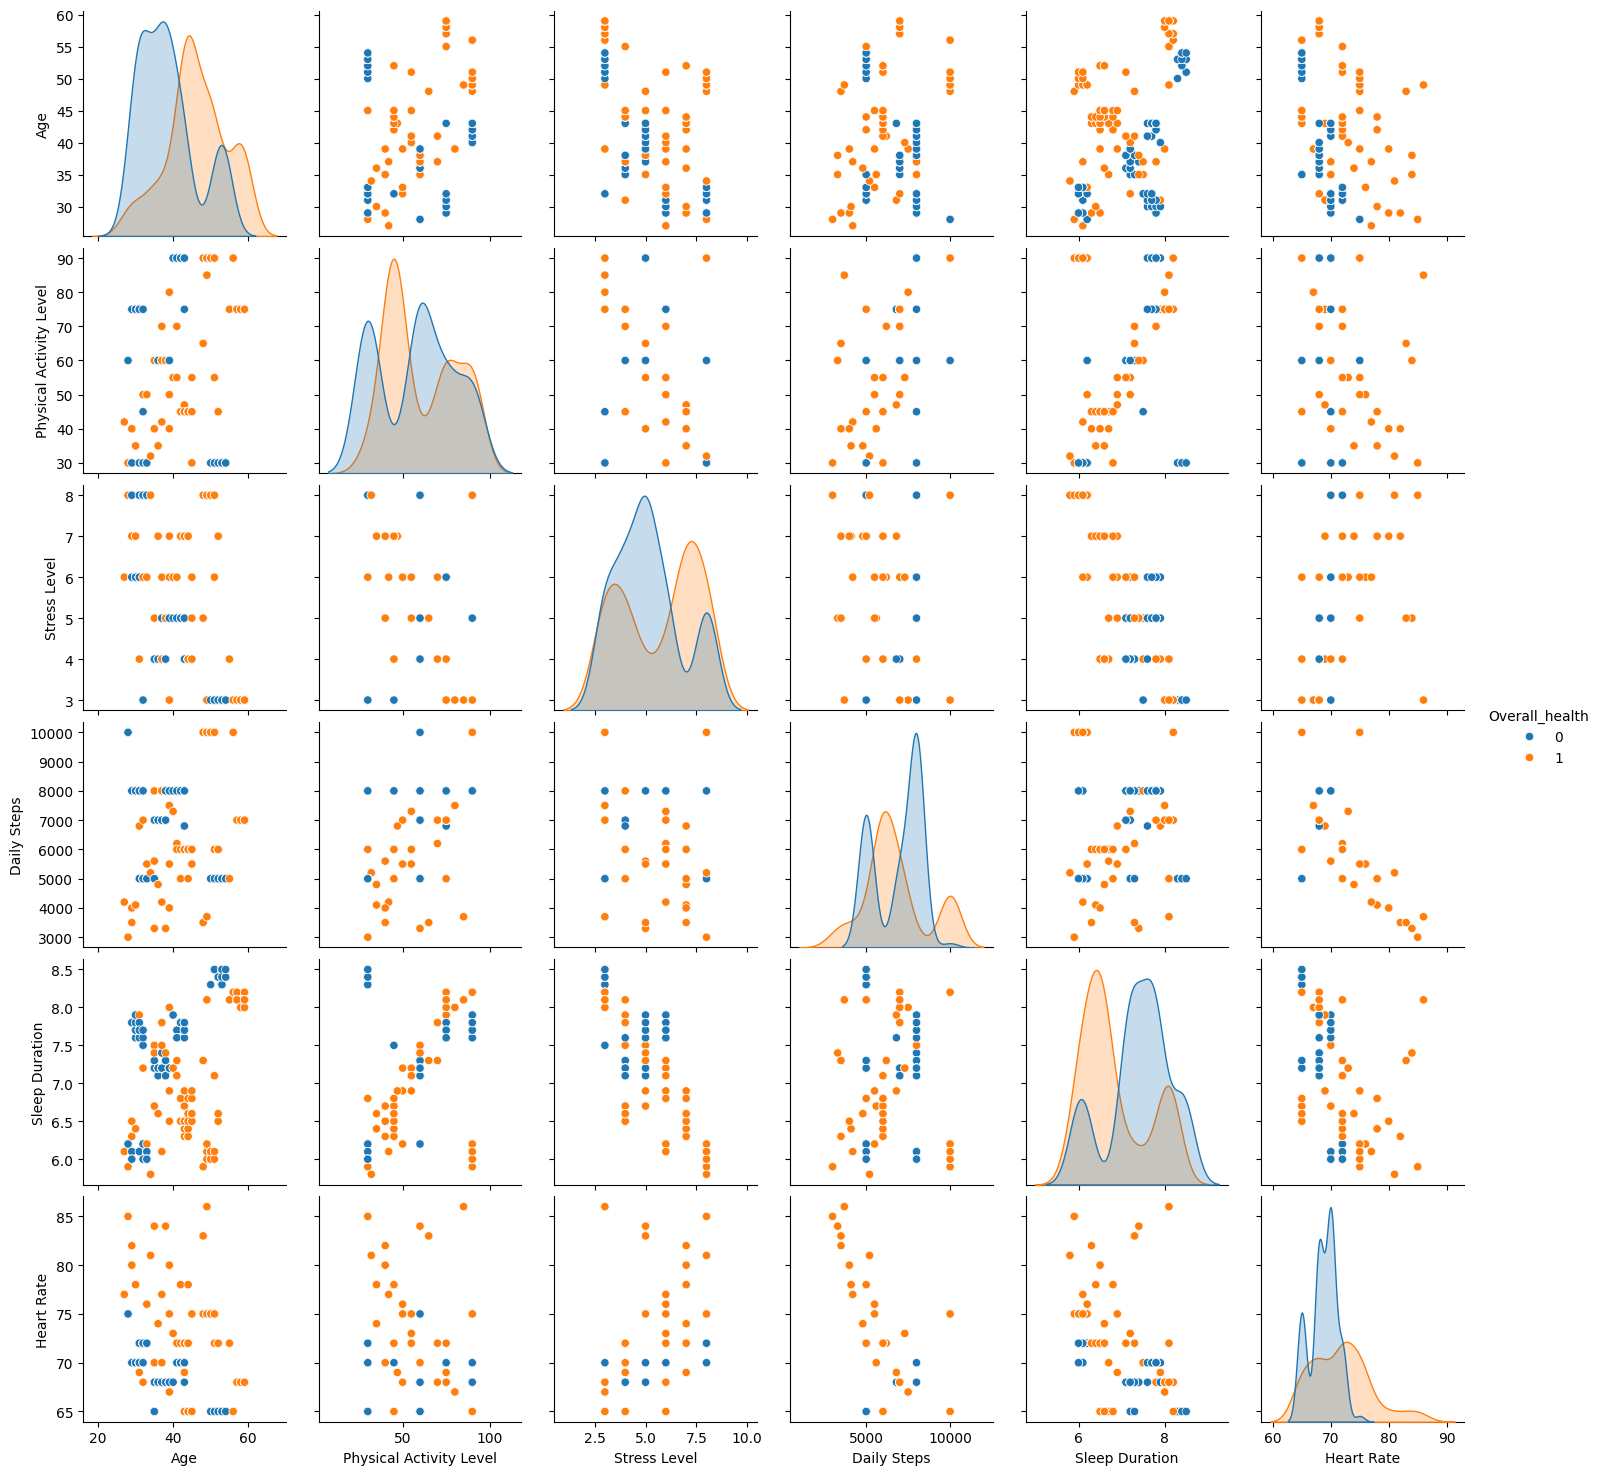

In [69]:
sns.pairplot(df3, vars=['Age', 'Physical Activity Level' ,'Stress Level','Daily Steps', 'Sleep Duration','Heart Rate'], hue = "Overall_health")

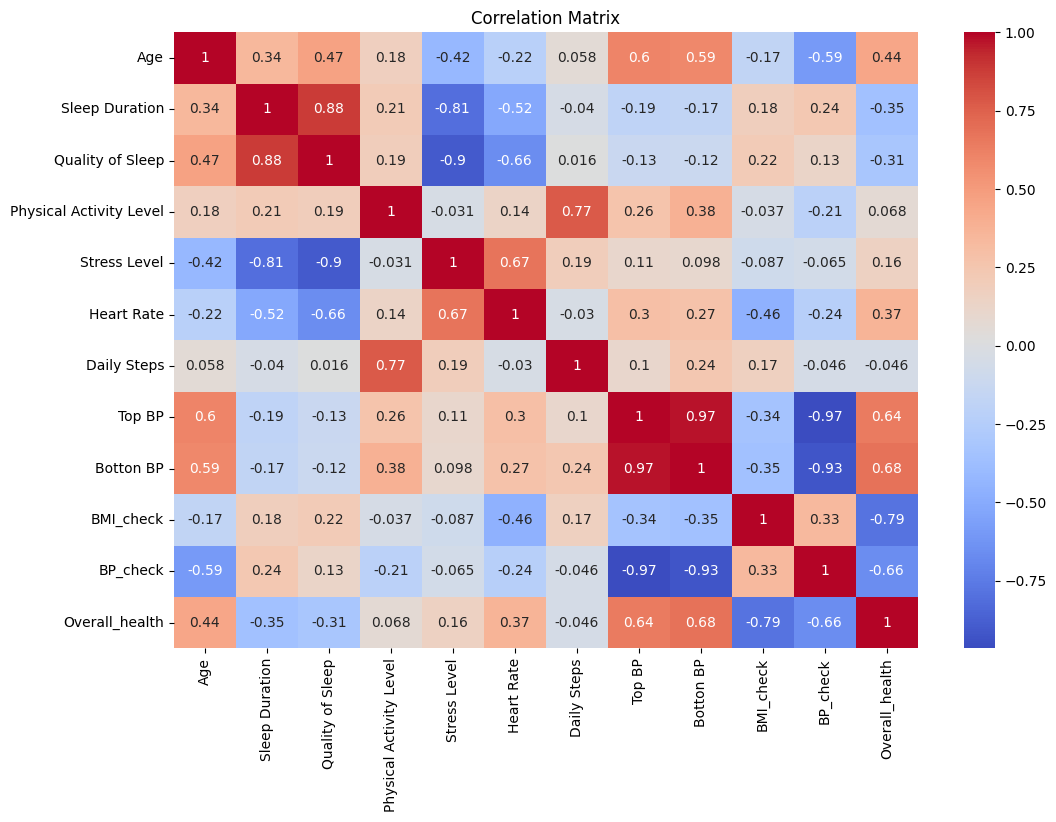

In [68]:
numeric_cols = df3.select_dtypes(include=np.number).columns  # اختيار الأعمدة الرقمية فقط
plt.figure(figsize=(12, 8))
sns.heatmap(df3[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

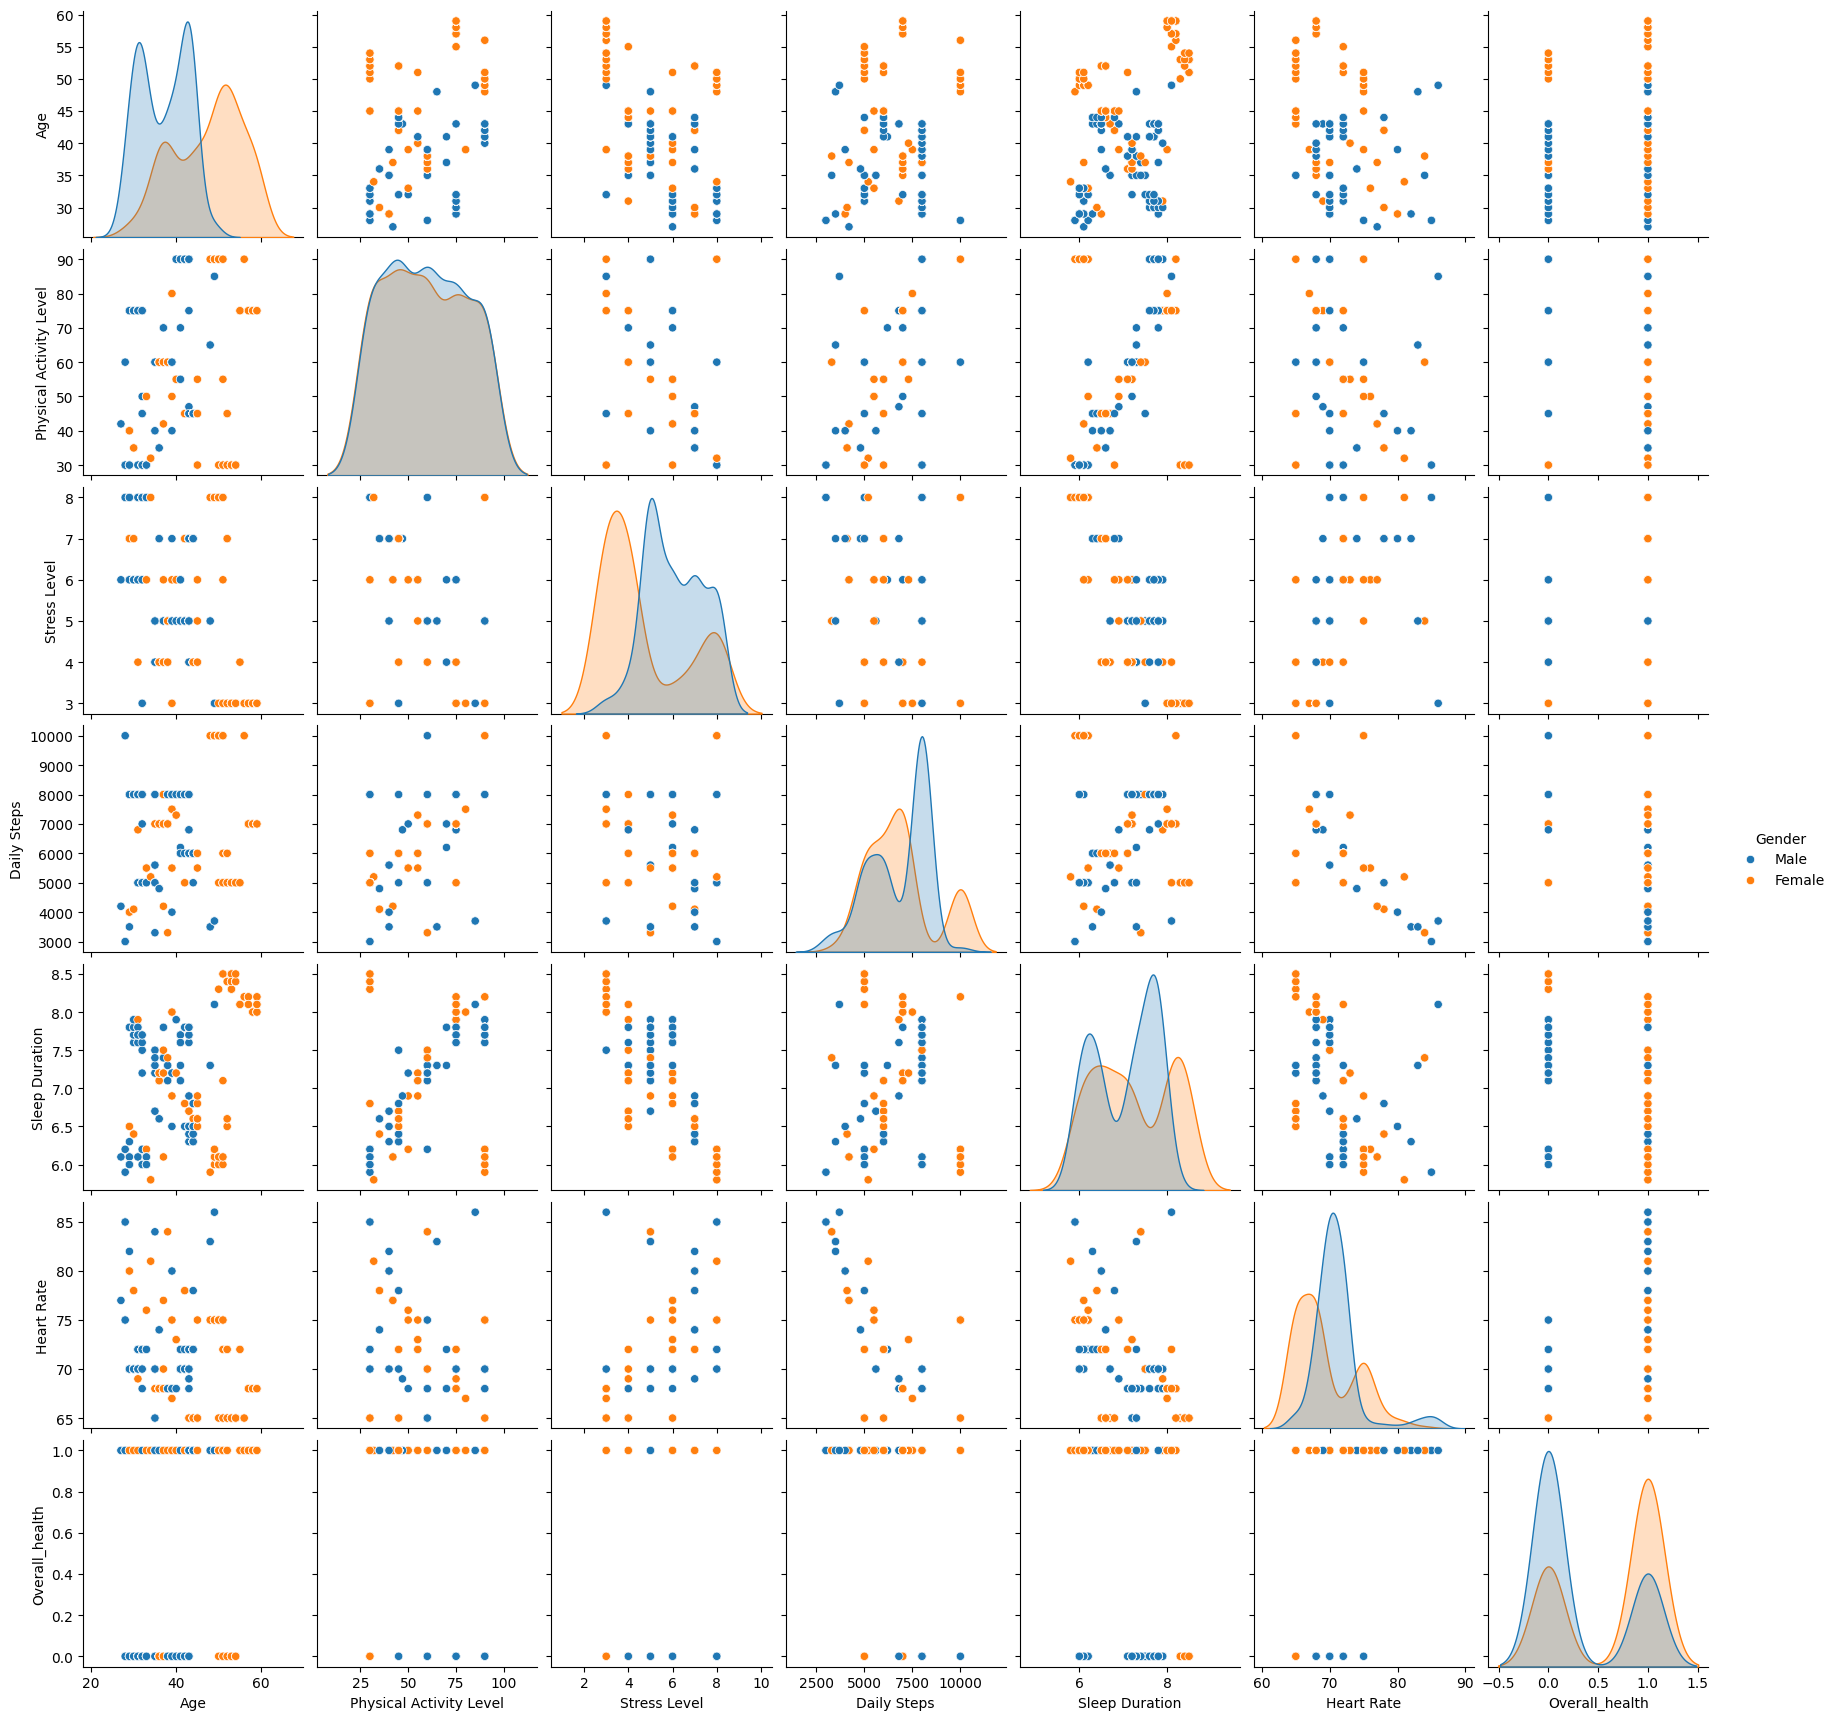

In [70]:
sns.pairplot(df3, vars=['Age','Physical Activity Level' ,'Stress Level','Daily Steps', 'Sleep Duration','Heart Rate','Overall_health'], hue = "Gender")

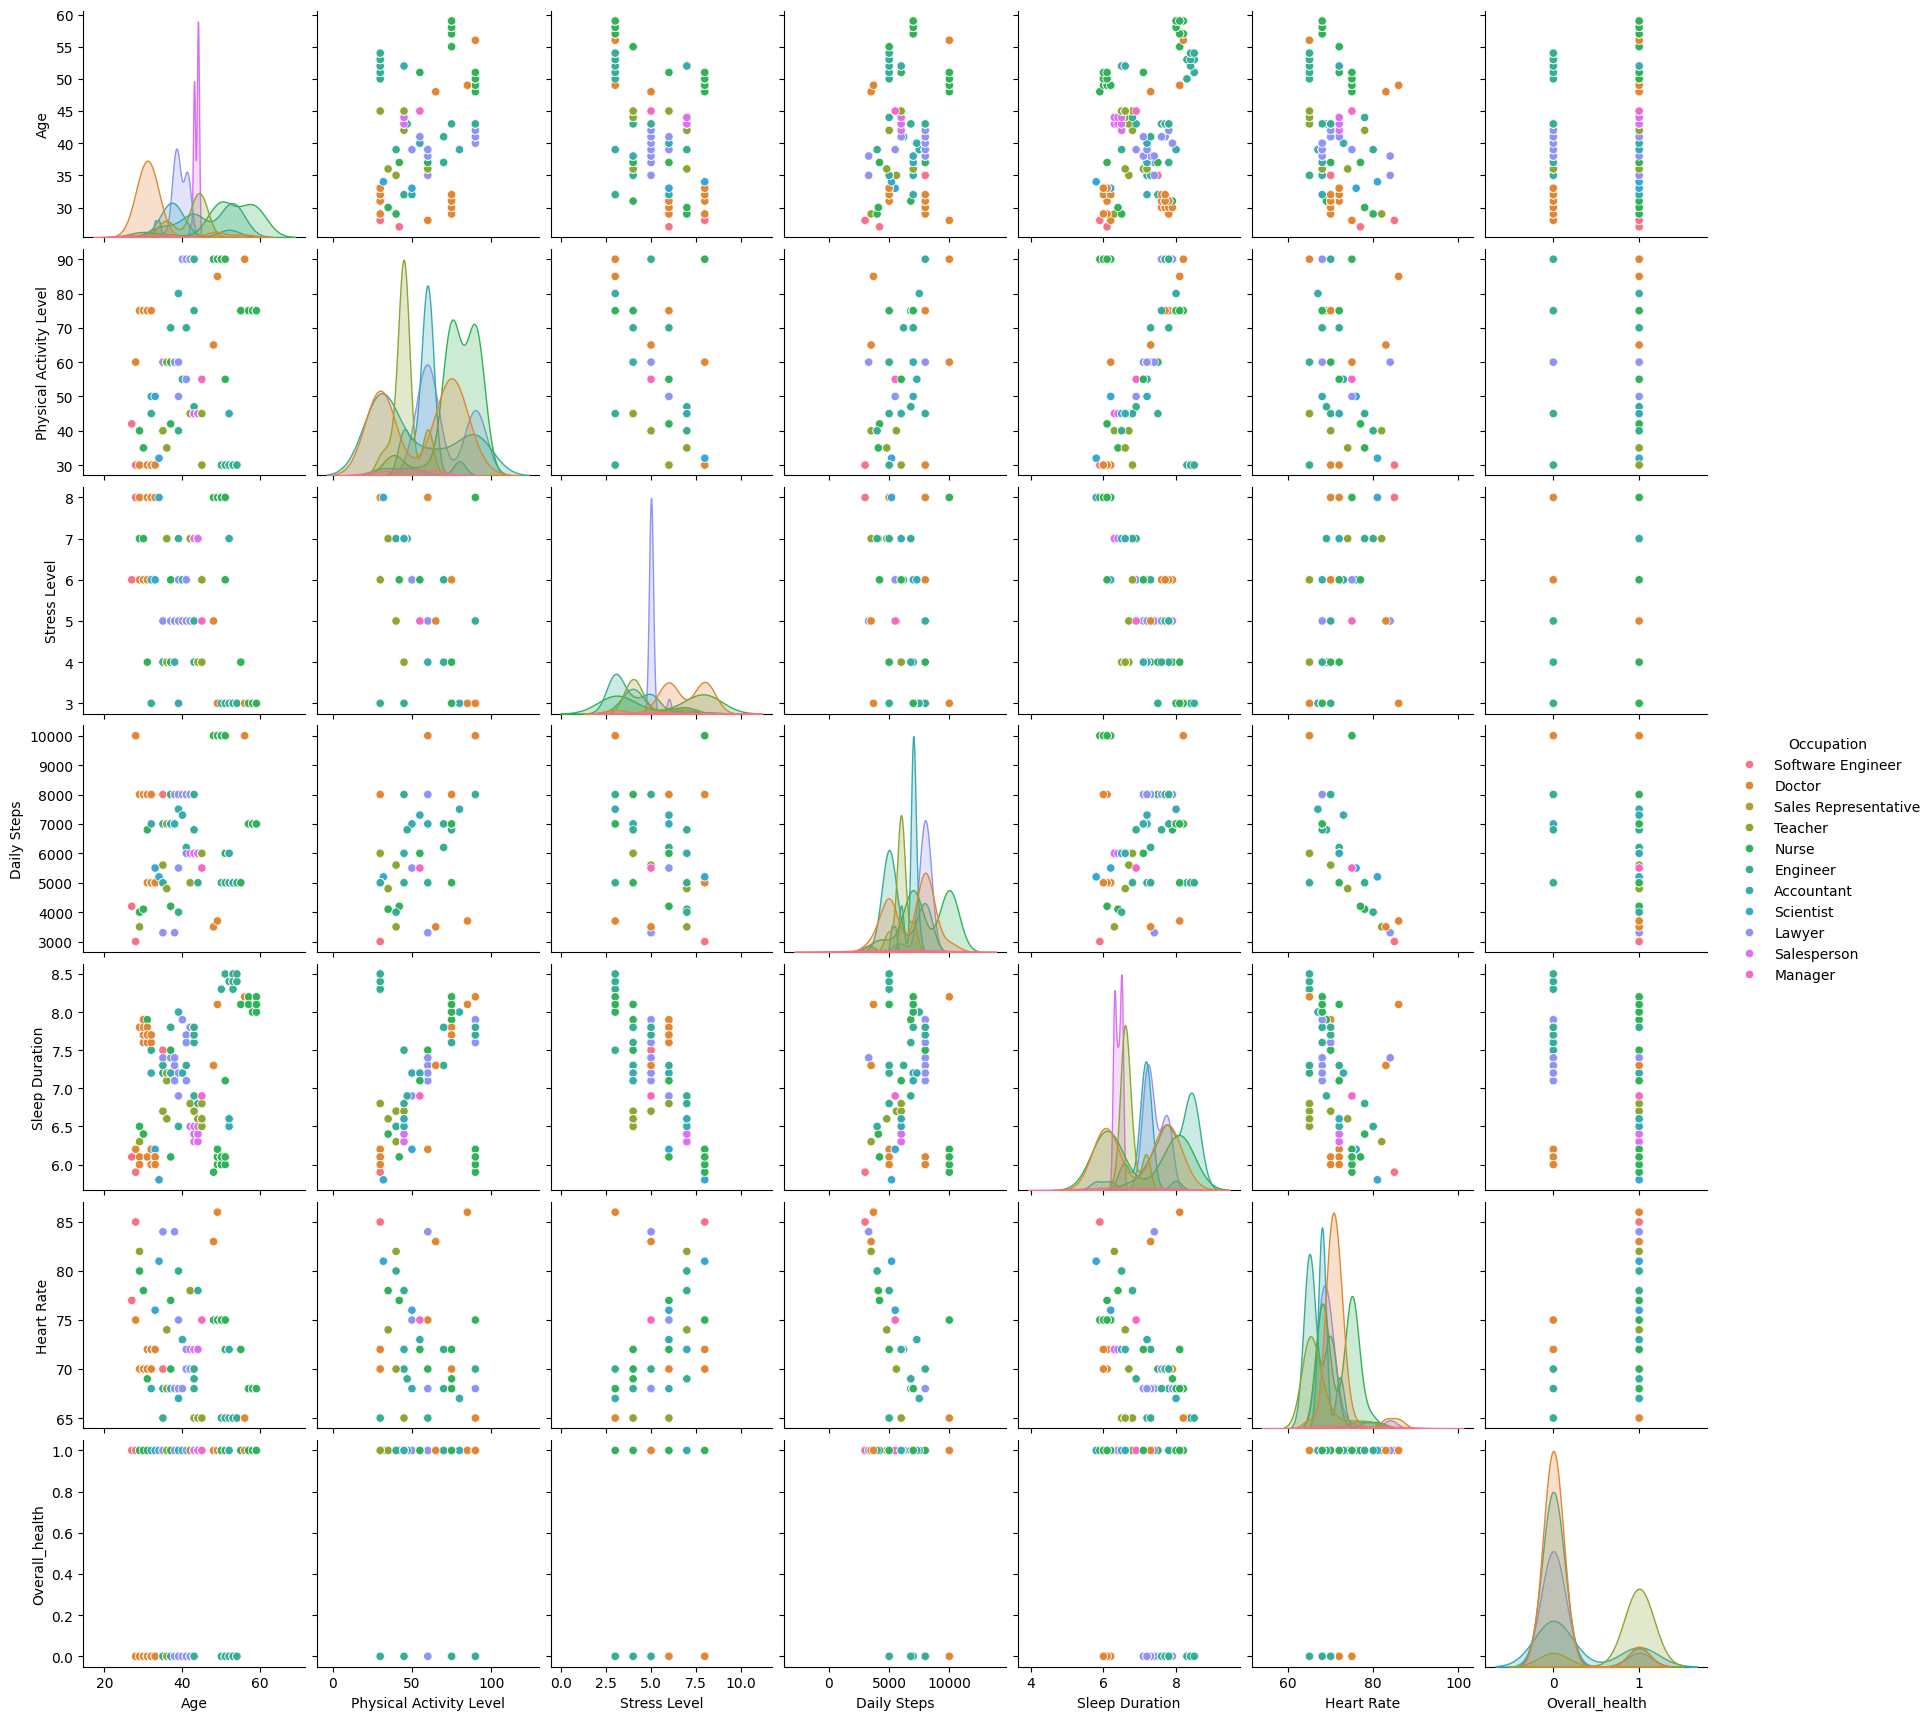

In [71]:
sns.pairplot(df3, vars=['Age','Physical Activity Level' ,'Stress Level','Daily Steps', 'Sleep Duration','Heart Rate','Overall_health'], hue = "Occupation")

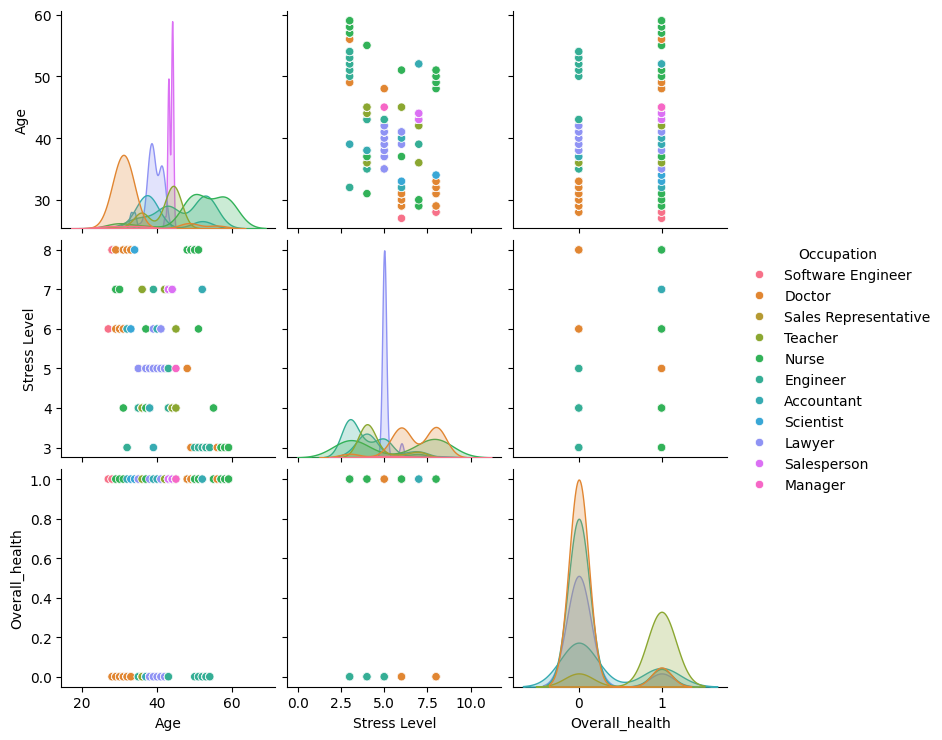

In [72]:
sns.pairplot(df3, vars=['Age','Stress Level','Overall_health'], hue = "Occupation")